In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
from Dynamic_clustering import assigning_cluster_id, calculate_new_cluster_centers

In [2]:
biomass_hist_df = pd.read_csv('Biomass_History.csv') # containes the information about the biomass produced in different years
dist_mat_df = pd.read_csv('Distance_Matrix.csv') # contains informtion about the distance between different locations

In [3]:
# The biomass dataframe which contains the amount of biomass produced
biomass_hist_df = biomass_hist_df.drop(columns = ['Index'])
biomass_hist_df

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885
...,...,...,...,...,...,...,...,...,...,...
2413,20.15456,72.84432,5.199882,4.516778,4.321080,2.658953,5.113997,5.301668,6.419223,5.321604
2414,20.15456,72.92394,0.122287,0.126717,0.101494,0.111509,0.121749,0.122467,0.145785,0.120626
2415,20.15456,73.00357,0.039415,0.040843,0.032713,0.035941,0.039241,0.039473,0.046989,0.038879
2416,20.15456,73.08319,2.719220,1.370163,0.818687,1.205721,1.316443,1.324201,1.576338,1.304297


In [4]:
# The distance matrix which contains the distance between different locations
dist_mat_df = dist_mat_df.drop(columns=['Unnamed: 0'])
dist_mat_df

,0,1,2,3,4,5,6,7,8,9,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,617.7221,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2414,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,609.9671,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2415,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,610.2964,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2416,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,617.5381,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


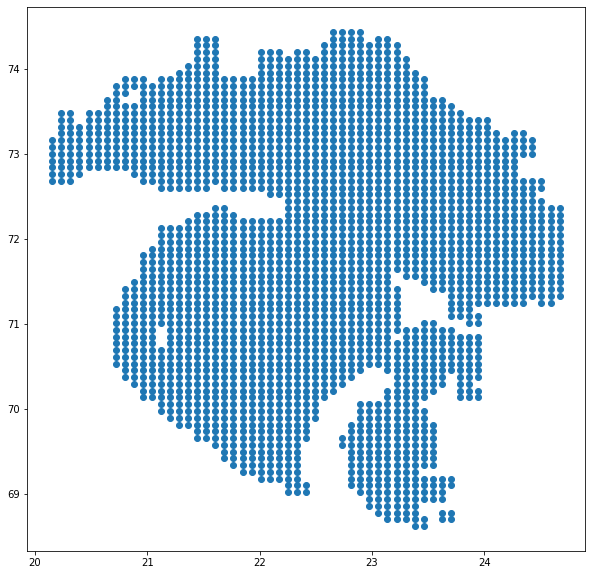

In [5]:
# Visualizating the plot of Gujrat - it is the location where the biomass has been produced
plt.figure(figsize=(10,10))
plt.scatter(biomass_hist_df['Latitude'], biomass_hist_df['Longitude'])

## Developing the clustering algorithm
<b>Steps :</b> <br>
    1) Randomly pick up n points <br>
    2) Assign all the points to the nearest centroid based on distance matrix <br>
    3) Update the centroid - Avg of the pts in each cluster grp (based on longitude and latitude) - find the most nearest pt from longitude, latitude list based on Euclidean distance. Get the index of that point and it is the new centroid <br>
    4) Repeat step 2-3 until centroids do not change <br>
    5) Make sure that each cluster is within the limit set

In [6]:
color_map = {
    0  : 'black',
    1  : 'blue',
    2  : 'green',
    3  : 'cyan',
    4  : 'magenta',
    5  : 'plum',
    6  : 'purple',
    7  : 'salmon',
    8  : 'tan',
    9  : 'teal',
    10 : 'violet',
    11 : 'wheat',
    12 : 'yellowgreen',
    13 : 'pink',
    14 : 'orchid',
    15 : 'olive',
    16 : 'maroon',
    17 : 'lime',
    18 : 'lightblue',
    19 : 'lavender',
    20 : 'khaki',
    21 : 'goldenrod',
    22 : 'fuchsia',
    23 : 'coral',
    24 : 'chocolate',
    25 : 'azure',
    26 : 'aquamarine',
    27 : 'lightgreen',
    28 : 'grey',
    29 : 'orange'
    
}

In [7]:
input_df = biomass_hist_df[['Latitude', 'Longitude', '2010']]
input_df

,Latitude,Longitude,2010
0,24.66818,71.33144,8.475744
1,24.66818,71.41106,24.029778
2,24.66818,71.49069,44.831635
3,24.66818,71.57031,59.974419
4,24.66818,71.64994,14.653370
...,...,...,...
2413,20.15456,72.84432,5.199882
2414,20.15456,72.92394,0.122287
2415,20.15456,73.00357,0.039415
2416,20.15456,73.08319,2.719220


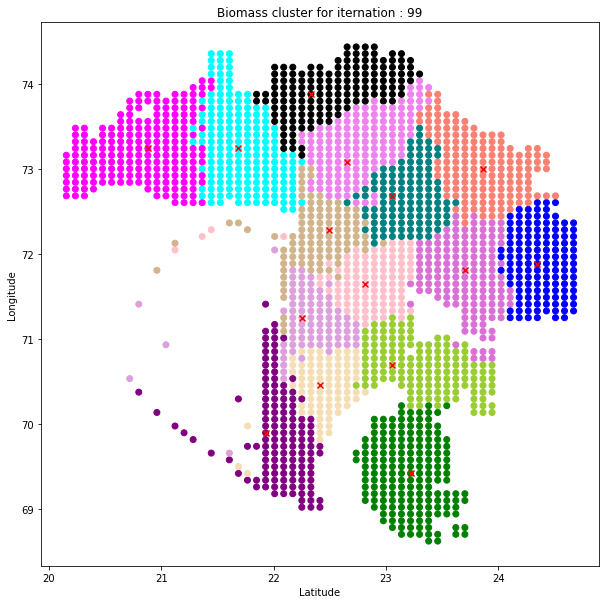

The kernel ended on the iteration 99


In [8]:
# Determining the position of the depots
# developing the whole pipeline
max_iteration = 100
max_clusters = 15
upper_limit = 20000.00

# Randomly pick up n points
index_number = input_df.index.tolist()
initial_centers = random.sample(index_number, max_clusters)
iter_max_dist_dict = dict()
cluster_center_dict = dict()
iter_weight_dict = dict()
#other_centers = [x for x in index_number if x not in initial_centers]

for iterations in range(max_iteration):
    input_df, cluster_dist_dict, total_dist = assigning_cluster_id(upper_limit, dist_mat_df, \
                                                                        input_df, initial_centers, year='2010')
    input_df_cleaned = input_df.dropna(subset=['cluster_id'])
    
    if len(initial_centers) < max_clusters:
        print('The solution is divering')
        break
    iter_max_dist_dict[iterations] = total_dist
    cluster_center_dict[iterations] = initial_centers
    iter_weight_dict[iterations] = input_df_cleaned['2010'].sum()
    ##### Ploting the clusters #####
    colors = input_df_cleaned['cluster_id'].map(color_map)
    clear_output(wait=True)
    plt.figure(figsize=(10,10))
    plt.scatter(input_df_cleaned['Latitude'], input_df_cleaned['Longitude'], c = colors)
    ### ploting the centers of the clusters ###
    x_centers = input_df.loc[initial_centers, 'Latitude']
    y_centers = input_df.loc[initial_centers, 'Longitude']
    plt.scatter(x_centers, y_centers, marker='x', c = 'red')
    ############################################
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title(f'Biomass cluster for iternation : {iterations}')
    plt.show()
    ############################################
    probable_center_df = input_df_cleaned.groupby('cluster_id')[['Latitude','Longitude']].mean()
#     display(probable_center_df)
    new_cluster_centers = calculate_new_cluster_centers(input_df_cleaned, probable_center_df, max_clusters, year='2010')
#     print(f'New cluster centers are : {new_cluster_centers}')
    if set(initial_centers) == set(new_cluster_centers):
        print(f'The initial_centers and new centers are same and iteration is {iterations}')
        break
    else:
        initial_centers = new_cluster_centers
print(f'The kernel ended on the iteration {iterations}')